# Assignment #7

Insert your code wherever you see multiple question marks.

Make your answers and plots look like those displayed.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib qt

## Part I - Naive Bayes

Using the first feature only (!) from the iris dataset, you'll implement (using sklearn) a Naive Bayesian Classifier, and visualize the underlying probability densities.

In [2]:
# use the iris dataset
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)
X = X[:, 0]
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# since the labels are sequential, shuffle the data
# hint: use sklearn's shuffle - google it
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=6)
print(y)

[0 2 0 0 2 1 2 0 2 1 2 1 2 2 1 2 2 1 1 0 0 2 0 0 1 1 1 2 0 1 0 1 0 0 2 2 1
 2 1 0 0 2 1 1 0 0 1 0 0 1 2 2 2 0 2 0 0 0 1 2 1 1 1 2 1 1 0 2 0 0 1 1 2 2
 2 1 1 2 2 1 1 0 2 2 0 0 2 2 1 2 1 0 1 2 0 0 2 0 0 0 0 0 0 1 2 0 2 1 0 2 1
 2 1 1 0 1 2 1 0 1 0 0 1 0 1 2 1 2 2 2 1 0 2 0 2 0 1 2 0 1 1 0 0 1 1 2 1 2
 2 2]


In [4]:
# split the data into 2/3 training and 1/3 test 
# hint: use sklearn's train_test_split - google it
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.reshape((-1,1)), y, test_size=1/3, random_state=6)

In [5]:
# use sklearn's Gaussian Naive Bayes classifier to make a classifier and train it using the training dataset
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [6]:
# Next we'll plot the underlying probabilities of the NB classifier (the "unnormalized posterior" numerator in Bayes theorem)

# first find the min and max values of x in X_train
min_val = np.min(X_train, axis=0)[0]
max_val = np.max(X_train, axis=0)[0]
# create an array with 100 evenly spaced values
# hint: use np.linspace
x_s = np.linspace(min_val,max_val,100)

In [7]:
# check the values of the means, variances, and priors for the 3 classes by printing them
print(f'class means = {gnb.theta_}')
print(f'class variances = {gnb.var_}')
print(f'class priors = {gnb.class_prior_}')

class means = [[5.015625  ]
 [5.95641026]
 [6.47586207]]
class variances = [[0.14069336]
 [0.23117686]
 [0.35562426]]
class priors = [0.32 0.39 0.29]


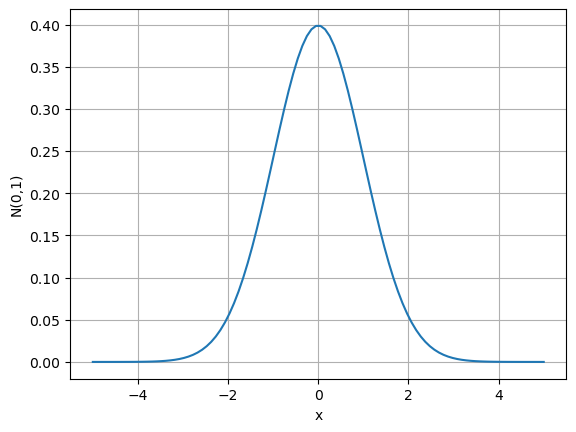

In [8]:
# define a single variable gaussian function
def gaussian(x,mu,sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# test it by plotting it on the interval [-5,5] with a mean of 0 and std of 1
# hint: use np.linspace()
x_s = np.linspace(-5, 5, 100)
y_s = gaussian(x_s,0,1)

plt.plot(x_s,y_s)
plt.xlabel('x')
plt.ylabel('N(0,1)')
plt.grid()

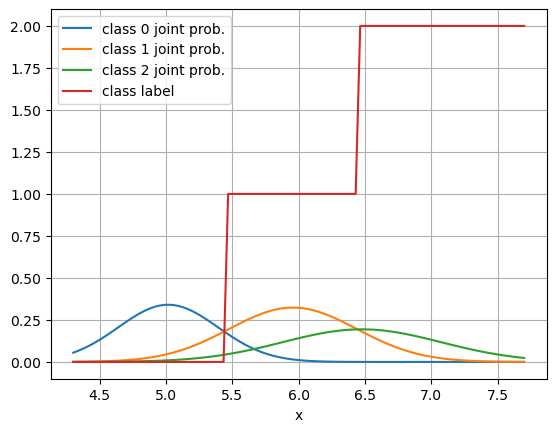

In [9]:
# Now generate a figure that will show the gaussian's of the NB classifier for all 3 classes,
# over the range of x from min to max (calculated previously) - specifically - we'll calc. the 
# numerator of Bayes Thm. (the "unnormalize prior" or "joint prob.") by multiplying by the class
# priors
plt.figure()
x_s = np.linspace(min_val, max_val, 100)

for c in range(3):
    y_s = gaussian(x_s, gnb.theta_[c,0], np.sqrt(gnb.var_[c,0]))*gnb.class_prior_[c] # remember std is square root of variance!
    plt.plot(x_s,y_s)
plt.grid()

# then use the classifier's predict method to predict the class results on the same interval on x, and
# show this on the same plot that the gaussian's are on
y_s = gnb.predict(x_s.reshape(-1, 1))

plt.xlabel('x')
plt.plot(x_s,y_s)
plt.legend(('class 0 joint prob.','class 1 joint prob.','class 2 joint prob.','class label'))

# Part II - Trees and Forests

In this problem you'll make your own forest from individual trees and compare the performances. 

In [10]:
import sklearn

# We'll use sklearn's moon dataset
X,y = sklearn.datasets.make_moons(n_samples=100, noise=0.5, random_state=10)
num_classes = 2
# and shuffle the data
X, y = shuffle(X, y, random_state=7)
print(y)
# and do an 80% train, 20% test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=42)

[0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0
 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1
 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1]


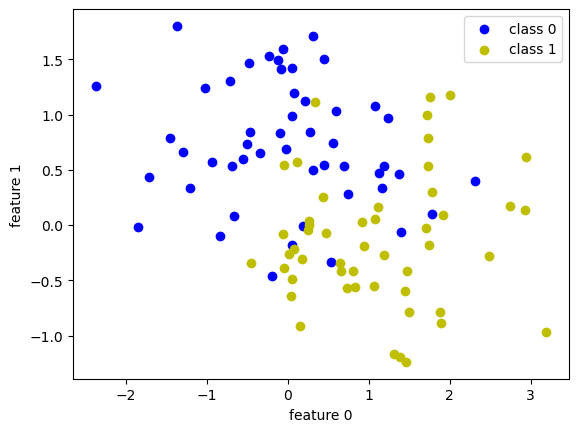

In [18]:
# then plot the data, showing the classes in different colors
plt.figure()
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='b')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='y')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(('class 0','class 1'))

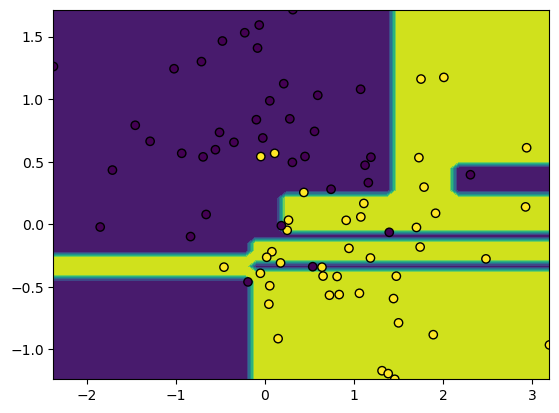

In [12]:
from sklearn.tree import DecisionTreeClassifier
# then make a single tree classifier
single_tree = DecisionTreeClassifier()
# fit that with the training data
tree = single_tree.fit(X_train, y_train)

# now we'll use sklearn's DecisionBoundaryDisplay to plot the classifier on the 2-D feature space
from sklearn.inspection import DecisionBoundaryDisplay
feature_1, feature_2 = np.meshgrid(
    np.linspace(X_train[:, 0].min(), X_train[:, 0].max()),
    np.linspace(X_train[:, 1].min(), X_train[:, 1].max())
)
grid = np.vstack([feature_1.flatten(), feature_2.flatten()]).T

y_pred_probs = np.reshape(tree.predict_proba(grid), (feature_1.shape[0],feature_1.shape[1],2))
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred_probs[:,:,1])
display.plot()
display.ax_.scatter(
    X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="black")
plt.show()

In [13]:
# then compute and print the accuracy of the single tree classifier
# hint: use sklearn's accuracy_score - google it
from sklearn.metrics import accuracy_score
y_pred = tree.predict(X_test)
print(f'Lone tree accuracy: {accuracy_score(y_test, y_pred)}')

Lone tree accuracy: 0.75


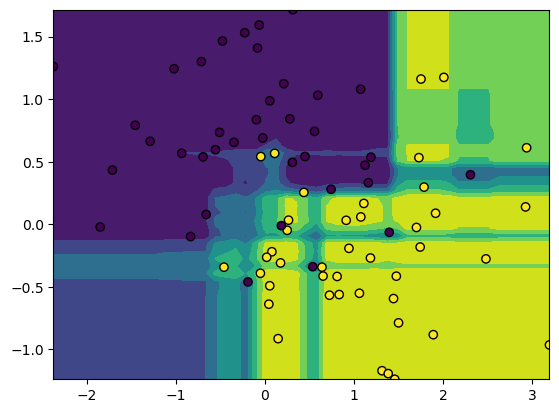

In [14]:
# Now we'll make a forest from individual trees
# to do that we'll need to make different training sets, sampled from the original, but _with _replacement
# then we'll train trees using those
# then we'll save the trees in a list
# then we'll use those on X_test to get probabilities for each class from each tree
# then we'll combine all those probabilities to get the forest's answer

# we'll show the decision boundaries of the forest first (like we did for a single tree earlier)
# then we'll calculate the accuracy of the forest on the test data

# --------------------------------------------------------
import copy 

num_trees = 100
forest = [] # this is a list that will hold trees

# make a "deep copy" of the original X_train and y_train
X_train_orig = copy.deepcopy(X_train)
y_train_orig = copy.deepcopy(y_train)

# import the module to sample from X with replacement
from sklearn.utils import resample

# create the grid of points we'll use to display decision boundaries
feature_1, feature_2 = np.meshgrid(
    np.linspace(X_train[:, 0].min(), X_train[:, 0].max()),
    np.linspace(X_train[:, 1].min(), X_train[:, 1].max())
)
grid = np.vstack([feature_1.flatten(), feature_2.flatten()]).T

# create an empty array to accumulate the probabilities from the trees in
y_pred_probs = np.zeros((feature_1.shape[0],feature_1.shape[1],2))

# make a for loop that iterates num_trees times
for n in range(num_trees):
    # sample from the training data with replacement
    X_train, y_train = resample(X_train_orig, y_train_orig, replace = True)
    # make a new tree
    tree = DecisionTreeClassifier()
    # train the tree with the resampled training data
    tree.fit(X_train, y_train)
    # put the tree into the forest (to make a list of trees)
    forest.append(tree)
    # calculate the tree's predicted probabilities on the grid
    tree_probs_grid = tree.predict_proba(grid)
    # add these into the accumulator for probabilities and reshape to a 2-D matrix
    y_pred_probs += np.reshape(tree_probs_grid, (feature_1.shape[0],feature_1.shape[1],2))
    
# normalize the summed probabilities in the accumulator by the number of trees
y_pred_probs += np.reshape(tree_probs_grid, (feature_1.shape[0], feature_1.shape[1], 2))

# we'll just show the probabilities for class 1 (and we know the prob's for class 0 = 1 - that)

# use sklearn to display the decision boundary
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred_probs[:,:,1]
)
display.plot()
display.ax_.scatter(
    X_train_orig[:, 0], X_train_orig[:, 1], c=y_train_orig, edgecolor="black"
)
plt.show()

In [15]:
# make a new accumulator array for probabilities just calculated on the test data
y_pred_probs = np.zeros((len(X_test), num_classes))

# loop over the number of trees
for n in range(num_trees):
    # calc. the probabilities and add those into the accumulator
    y_pred_probs += forest[n].predict_proba(X_test)
    
# normalize by the number of trees
y_pred_probs /= num_trees

# get the final answer by finding the max prob. class for each test point 
y_pred = np.argmax(y_pred_probs,axis = 1)
# compute and print the accuracy the same way we did for the single tree
print(f'Forest accuracy: {accuracy_score(y_test, y_pred)}')

Forest accuracy: 0.8


Briefly answer the following questions:

What differences do you observe in the decision boundary plots between the single tree and the forest?

Which model is less likely to overfit?

1. The differences were mainly in how thick the boundaries were between the purple and yellow sections. With the single tree classifier, the transition areas were very thin, but the random forest had a larger buffer zone between sections. 


2. The random forest model seemed much less likely to overfit. The lone tree model made whole sections for individual points, whereas the random forest seemed to take random points more in moderation rather than carving out huge chunks, thereby underfitting. 